# Comparison different ways of summing elements from file

In [1]:
import csv
from numpy.random import randint

In [4]:
def generate_file(sizes_in_Mb):
    for size in sizes_in_Mb:
        with open(f'test_file_{size}_Mb.csv', 'w', newline='') as output_file:
            writer = csv.writer(output_file)
            for _ in range(size*1024*1024//6):
                writer.writerow([randint(1000,9999)])
        print(f'{size} Mb file generated!')

In [5]:
while True:
    files_present = input("Do you have already csv-files with the required sizes (1,10,50 Mb)? (Y/N) ")
    if files_present in ['Y','y','yes','N','n','no']:
        break
if files_present in ['N','n','no']:
    print("Generating files in current working directory...")
    generate_file(sizes_in_Mb=[1,10,50])
    print("Generating completed successfully!")

Do you have already csv-files with the required sizes (1,10,50 Mb)? (Y/N)n
Generating files in current working directory...
1 Mb file generated!
10 Mb file generated!
50 Mb file generated!
Generating completed successfully!


In [6]:
# iterator
def sum_iterator(filename): 
    s = 0
    with open(filename,'r') as file:
        for line in file:
            s += int(line)  
    return s

In [7]:
%timeit sum_iterator('test_file_1_Mb.csv')

80 ms ± 12.5 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [8]:
%timeit sum_iterator('test_file_10_Mb.csv')

741 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit sum_iterator('test_file_50_Mb.csv')

3.85 s ± 216 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
#generator
def sum_generator(filename):
    with open(filename,'r') as file:
        lines = (line for line in file)
        numbers = (x for x in lines if x.isnumeric())
        return sum(numbers)

In [11]:
%timeit sum_generator('test_file_1_Mb.csv')

44.8 ms ± 912 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit sum_generator('test_file_10_Mb.csv')

480 ms ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit sum_generator('test_file_50_Mb.csv')

2.39 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# readlines
def sum_list(filename): 
    with open(filename,'r') as file:
        lines = file.readlines()
    return sum([int(x) for x in lines])

In [15]:
%timeit sum_list('test_file_1_Mb.csv')

96.6 ms ± 5.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit sum_list('test_file_10_Mb.csv')

1.13 s ± 68.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit sum_list('test_file_50_Mb.csv')

5.39 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = [[45,  80, 97],
        [480,  741, 1130],
        [2390, 3850, 5390]]
sum_time = pd.DataFrame(data=data,
                        columns=['generator','iterator','read_all'],
                        index=["1M(ms)","10M(ms)","50M(ms)"])

In [7]:
sum_time

,generator,iterator,read_all
1M(ms),45,80,97
10M(ms),480,741,1130
50M(ms),2390,3850,5390


The best solution is **generator**

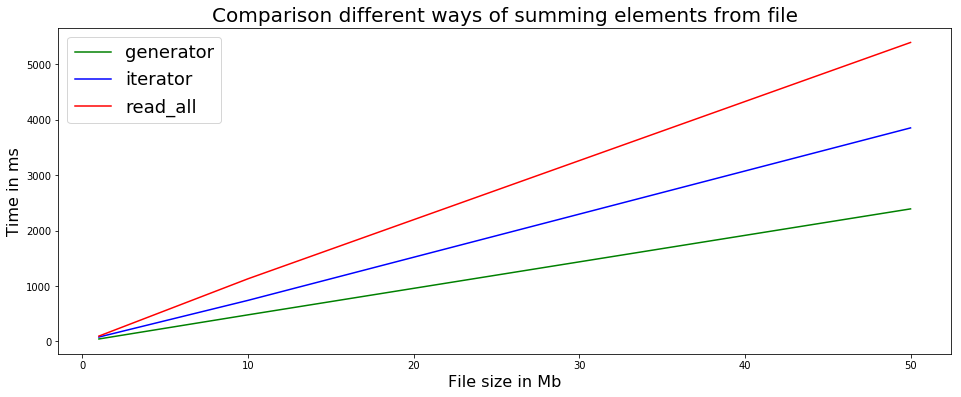

In [27]:
figure, axis = plt.subplots(figsize=(16,6))
color = iter(['green','blue','red'])
for column in sum_time.columns:
    plt.plot([1,10,50],sum_time[column].values, color=next(color), label=column)

plt.title("Comparison different ways of summing elements from file",fontsize=20)
plt.ylabel("Time in ms",fontsize=16)
plt.xlabel("File size in Mb",fontsize=16)
plt.legend(fontsize=18)
plt.show()